# Modular Neural Network for CIFAR 10


In the below lines of code, an attempt to implement MNN for CIFAR 10 dataset has been made. 

* Contents of dataset :  
> 60000 32x32 colour images in 10 classes, with 6000 images per class
> There are 50000 training images and 10000 test images

* The model that has been implemented based on the [research paper](https://drive.google.com/file/d/1eLd8RO6nVFDBdYpXCGVngzabiVaIphKM/view?usp=sharing) :

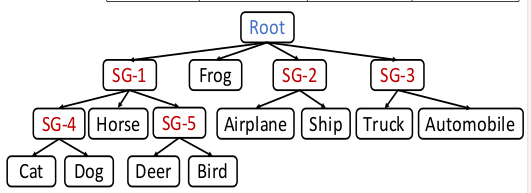



# 1. Loading the dataset and obtaining training and test sets

In [1]:
# Importing libraries initially required
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.datasets import cifar10

# loading cifar 10 dataset for training and testing.
#x--> Images, y--> labels
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [2]:
print(x_train.shape)

(50000, 32, 32, 3)


In [3]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#----------0:g2,-----1:g3,-----2:g1,5---3:g1,4-----4:g1,5-----5:g1,4----6:g0---7:g1-----8:g2------9:g3

#normalizing the data
x_train=x_train/255.0
x_train.shape
x_test=x_test/255.0
x_test.shape

#reshaping 2D shape of labels to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)


Root (level 0)- VGG block of size 1
Supergroups at level 1 - VGG block of size 2
Supergroups at level 2 - VGG block of size 3


# 2. Loading root node

In [4]:
import keras
import tensorflow as tf
root = tf.keras.models.load_model('root.h5')

loss,va1= root.evaluate(x_test,y_test,8)


2021-10-20 17:23:39.733384: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 17:23:39.781319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 17:23:39.781734: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 17:23:39.782315: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

1250/1250 [==============================] - 4s 1ms/step - loss: 5.4917 - accuracy: 0.6385


In [5]:
import gc

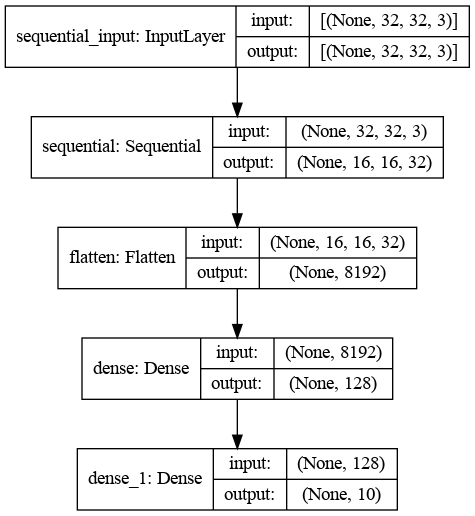

In [6]:
from keras.utils.vis_utils import plot_model
plot_model(root, to_file='root.png', show_shapes=True, show_layer_names=True)

In [7]:
gc.collect()

2065

In [8]:
#from root
MS1=6

#initializing for reference
va2=0
MS2=0
threshold=0.1

def delta_AD(va1,va2,MS1,MS2):
    AD=((va2-va1)/(MS2-MS1))
    return AD

In [9]:
AD_temp=delta_AD(va1,va2,MS1,MS2)

In [10]:
print(AD_temp)
print(va1,va2,MS1,MS2)

print("Accuracy of root node ",va1*100)

0.10641666253407796
0.6384999752044678 0 6 0
Accuracy of root node  63.84999752044678


# 3. Testing trained supergroups 



In [11]:
'''
----------------0------------1---------2------3-----4-----5-------6------7------8-------9-----
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#----------0:g2,-----1:g3,-----2:g1,5---3:g1,4-----4:g1,5-----5:g1,4----6:g0---7:g1-----8:g2------9:g3
#frog--> 
#airplane,ship :              0,8 --- > g2
#automobile,truck:            1,9 ---> g3
#bird,cat,deer,dog,horse:  2,3,4,5,7
#cat,dog --> sg4 (3,5)
#bird,deer --> sg5 (2,4)
###################################################################################################################################################
'''
import gc

y=len(y_test)

AD0=AD_temp
AD1=AD_temp
AD2=AD_temp
AD3=AD_temp
AD4=AD_temp
AD5=AD_temp

va_g0=0
va_g1=0
va_g2=0
va_g3=0

batch_size=16
lr=0.0001
opt_02 = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

ep=10

sg1_conv=0
for i in range(y):
    if y_test[i] in [6] :
            print('super group 0 : AD = ',AD0)
            sg0 = tf.keras.models.load_model('sg0.h5')            
            loss,va2= sg0.evaluate(x_test,y_test,8)
            AD0=delta_AD(va1,va2,MS1,MS2)
            va_g0=va2
            print('super group 0 : AD = ',AD0)
            MS2=9
            if(AD0<threshold):
                break
gc.collect()

for i in range(y):
    if y_test[i] in [0,8] :
          if (AD2>threshold):
            print('Super group 2: AD = ',AD2)
            sg2 = tf.keras.models.load_model('sg2.h5')            
            loss,va2= sg2.evaluate(x_test,y_test,8)
            AD2=delta_AD(va1,va2,MS1,MS2)
            va_g2=va2
            print('super group 2 : AD = ',AD2)
            MS2=9
            if(AD2<threshold):
                break
gc.collect()

for i in range(y):
    if y_test[i] in [1,9] :
        if (AD3>threshold):
            print('Super group 3 : AD = ',AD3)
            sg3 = tf.keras.models.load_model('sg3.h5')            
            loss,va2= sg3.evaluate(x_test,y_test,8)
            AD3=delta_AD(va1,va2,MS1,MS2)
            va_g3=va2
            print('super group 3 : AD = ',AD3)
            MS2=9
            if(AD3<threshold):
                break
gc.collect()

for i in range(y):
    if y_test[i] in [2,3,4,5,7] : #g5--> horse
        if (AD1>threshold):
            print('Super group 1: AD = ',AD1)
            sg1 = tf.keras.models.load_model('sg1.h5')            
            loss,va1_temp= sg1.evaluate(x_test,y_test,8)
            AD1=delta_AD(va1_temp,va2,MS1,MS2)
            print('super group 1 : AD = ',AD1)
            MS2=9
            va_g1=va2
            if (AD4>threshold) and (y_test[i] in  [3,5]): 
                print('Super group 4:: AD = ',AD4)
                sg4 = tf.keras.models.load_model('sg4.h5')            
                loss,va2=sg4.evaluate(x_test,y_test)
                AD4=delta_AD(va1,va2,MS1,MS2)
                MS2=9
                va_g4=va2
                print('super group 4 : AD = ',AD4)
                if(AD4<threshold):
                    gc.collect()
                    break
                    
for i in range(y):
    if y_test[i] in [2,3,4,5,7] : #g5--> horse
            if (AD5>threshold) and (y_test[i] in  [2,4]): 
                print('Super group 5:: AD = ',AD5)
                sg5 = tf.keras.models.load_model('sg5.h5')            
                loss,va2=sg5.evaluate(x_test,y_test)
                AD5=delta_AD(va1,va2,MS1,MS2)
                MS2=12
                va_g5=va2
                print('super group 5 : AD = ',AD5)
                if(AD5<threshold):
                    gc.collect()
                    break
               



super group 0 : AD =  0.10641666253407796


2021-10-20 17:23:47.972069: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.
2021-10-20 17:23:48.086294: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 [==============================] - 2s 1ms/step - loss: 1.3035 - accuracy: 0.7293
super group 0 : AD =  -0.015133341153462728
Super group 2: AD =  0.10641666253407796
  39/1250 [..............................] - ETA: 1s - loss: 0.9791 - accuracy: 0.7115  

2021-10-20 17:23:50.341278: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 [==============================] - 2s 1ms/step - loss: 1.0673 - accuracy: 0.7123
super group 2 : AD =  0.024600009123484295
Super group 3 : AD =  0.10641666253407796
1250/1250 [==============================] - 2s 1ms/step - loss: 1.1512 - accuracy: 0.7162
super group 3 : AD =  0.02590000629425049
Super group 1: AD =  0.10641666253407796
1250/1250 [==============================] - 2s 1ms/step - loss: 1.1495 - accuracy: 0.7230
super group 1 : AD =  -0.00226666529973348
Super group 4:: AD =  0.10641666253407796
313/313 [==============================] - 1s 3ms/step - loss: 0.9401 - accuracy: 0.7408
super group 4 : AD =  0.03410001595815023
Super group 5:: AD =  0.10641666253407796
313/313 [==============================] - 1s 2ms/step - loss: 0.8720 - accuracy: 0.7332
super group 5 : AD =  0.03156667947769165


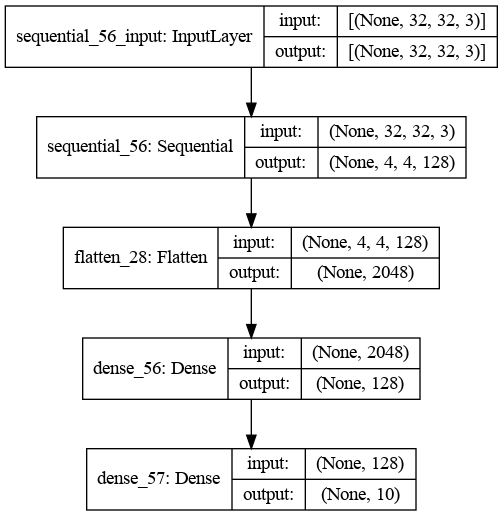

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(sg5, to_file='sg5.png', show_shapes=True, show_layer_names=True)

# 4. Checking to ensure improvement in accuracy

In [13]:

if va_g0!=0: print("Accuracy of supergroup 0 :",va_g0*100)
if va_g1!=0: print("Accuracy of supergroup 1 :",va_g1*100)
if va_g2!=0: print("Accuracy of supergroup 2 :",va_g2*100)
if va_g3!=0: print("Accuracy of supergroup 3 :",va_g3*100)
if va_g4!=0: print("Accuracy of supergroup 4 :",va_g4*100)
if va_g5!=0: print("Accuracy of supergroup 5 :",va_g5*100)

Accuracy of supergroup 0 : 72.93000221252441
Accuracy of supergroup 1 : 71.61999940872192
Accuracy of supergroup 2 : 71.23000025749207
Accuracy of supergroup 3 : 71.61999940872192
Accuracy of supergroup 4 : 74.08000230789185
Accuracy of supergroup 5 : 73.32000136375427


In [14]:
va_list=[va_g0,va_g1,va_g2,va_g3,va_g4,va_g5]

In [15]:
print("Accuracy of root node :",va1*100)
for i in range(6):
    if va_list[i]>va1:
        print("Supergroup ",i," has improved. From ",va1*100,"% to ",va_list[i]*100,"%")

Accuracy of root node : 63.84999752044678
Supergroup  0  has improved. From  63.84999752044678 % to  72.93000221252441 %
Supergroup  1  has improved. From  63.84999752044678 % to  71.61999940872192 %
Supergroup  2  has improved. From  63.84999752044678 % to  71.23000025749207 %
Supergroup  3  has improved. From  63.84999752044678 % to  71.61999940872192 %
Supergroup  4  has improved. From  63.84999752044678 % to  74.08000230789185 %
Supergroup  5  has improved. From  63.84999752044678 % to  73.32000136375427 %


In [16]:
root.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 16, 16, 32)        10144     
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
_________________________________________________________________


In [17]:
sg0.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 8, 8, 64)          65568     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,274
Trainable params: 591,274
Non-trainable params: 0
_________________________________________________________________


In [18]:
sg1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_18 (Sequential)   (None, 8, 8, 64)          65568     
_________________________________________________________________
flatten_9 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 591,274
Trainable params: 591,274
Non-trainable params: 0
_________________________________________________________________


In [19]:
gc.collect()

3835

# 5. Checking with custom images that are not a part of the dataset

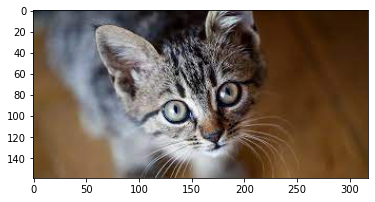

Prediction :  horse


In [20]:
from PIL import Image
import numpy as np
from skimage import transform
import os
import matplotlib.image as mpimg

'''
#frog--> 
#airplane,ship :              0,8 --- > g2
#automobile,truck:            1,9 ---> g3
#bird,cat,deer,dog,horse:  2,3,4,5,7
#cat,dog --> sg4
#bird,deer --> sg5
'''

file=r'images'+os.sep+r'01.jpg'
def load(file):
    np_image = Image.open(file)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (32, 32, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(file)
pred=np.argmax(sg4.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])



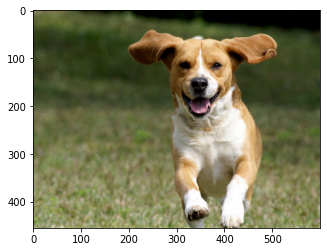

Prediction :  dog


In [21]:
file=r'images'+os.sep+r'02.jpg'

image = load(file)
pred=np.argmax(sg4.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])

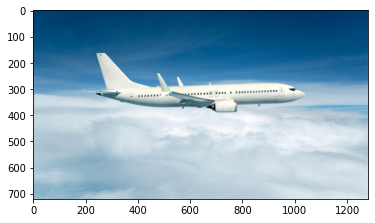

Prediction :  airplane


In [22]:
file=r'images'+os.sep+r'03.jpg'

image = load(file)
pred=np.argmax(sg2.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])

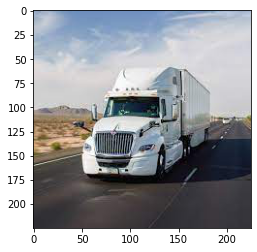

Prediction :  truck


In [23]:
file=r'images'+os.sep+r'04.jpg'

image = load(file)
pred=np.argmax(sg2.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])

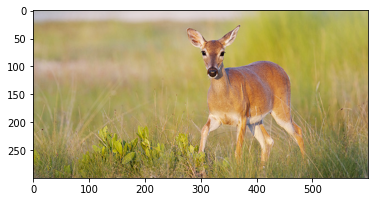

Prediction :  deer


In [24]:
file=r'images'+os.sep+r'05.jpg'

image = load(file)
pred=np.argmax(sg5.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])

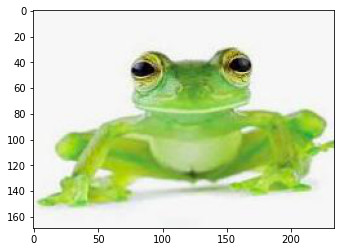

Prediction :  frog


In [25]:
file=r'images'+os.sep+r'06.jpg'

image = load(file)
pred=np.argmax(sg0.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])

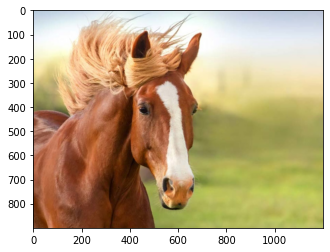

Prediction :  cat


In [26]:
file=r'images'+os.sep+r'07.jpg'

image = load(file)
pred=np.argmax(sg1.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])


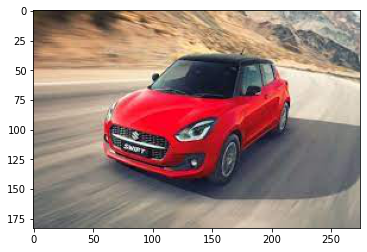

Prediction :  automobile


In [27]:
file=r'images'+os.sep+r'08.jpg'

image = load(file)
pred=np.argmax(sg3.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])

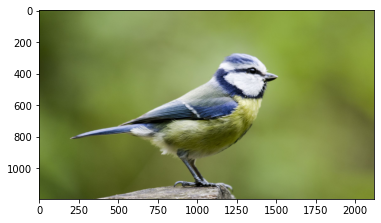

Prediction :  bird


In [28]:
file=r'images'+os.sep+r'09.jpg'

image = load(file)
pred=np.argmax(sg5.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])

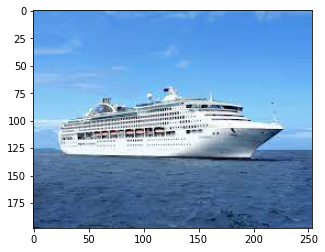

Prediction :  ship


In [29]:
file=r'images'+os.sep+r'10.jpg'

image = load(file)
pred=np.argmax(sg2.predict(image))

img = mpimg.imread(file)
imgplot = plt.imshow(img)
plt.show()
print("Prediction : ", class_names[pred])

# 6. Checking with sample images that from the CIFAR-10 dataset

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [31]:
gc.collect()

29147

In [32]:
'''
----------------0------------1---------2------3-----4-----5-------6------7------8-------9-----
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#----------0:g2,-----1:g3,-----2:g1,5---3:g1,4-----4:g1,5-----5:g1,4----6:g0---7:g1-----8:g2------9:g3
#frog--> 
#airplane,ship :              0,8 --- > g2
#automobile,truck:            1,9 ---> g3
#bird,cat,deer,dog,horse:  2,3,4,5,7
#cat,dog --> sg4 (3,5)
#bird,deer --> sg5 (2,4)
###################################################################################################################################################
'''
if y_test.all() in [6]: predictions = sg0.predict(x_test)
if y_test.all() in [2,3,4,5,7]: predictions = sg1.predict(x_test)
if y_test.all() in [0,8]: predictions = sg2.predict(x_test)
if y_test.all() in [1,9]: predictions = sg3.predict(x_test)
if y_test.all() in [3,5]: predictions = sg3.predict(x_test)

if y_test.all() in [2,4]: predictions = sg5.predict(x_test)


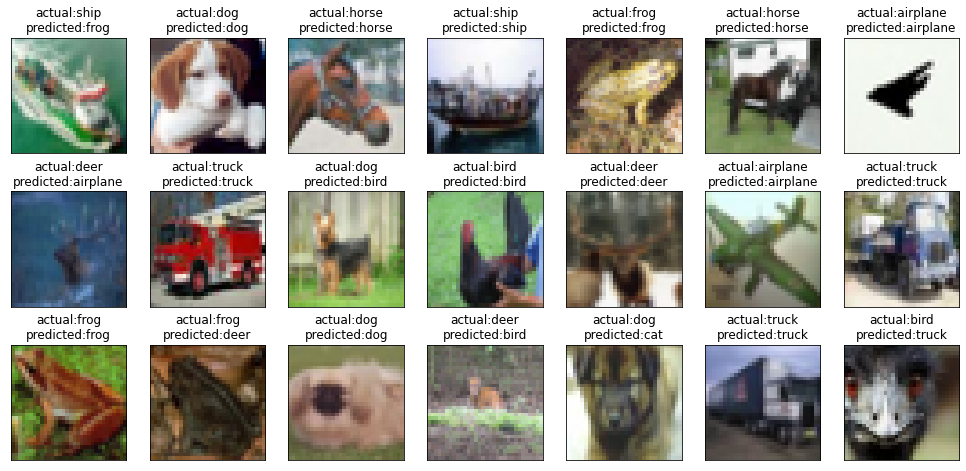

In [33]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 15
for i in range(3):
    for j in range(7):
        
            axes[i,j].set_title('actual:' + class_names[int(y_test[index])] + '\n' + 'predicted:' + class_names[int(np.argmax(predictions[index]))])
            axes[i,j].imshow(x_test[index], cmap='gray')
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            index += 1
plt.show()

# Conclusion :
* All supergroups  have shown improvement in accuracy and it has been cross check